(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Цифра: 5


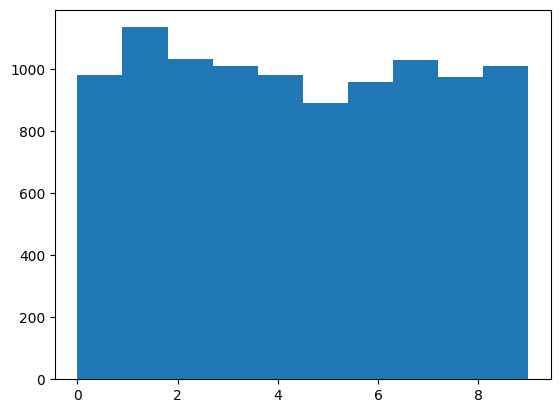

Epoch 1/5
375/375 [==============================] - 50s 130ms/step - loss: 0.1503 - sparse_categorical_accuracy: 0.9561 - val_loss: 0.0553 - val_sparse_categorical_accuracy: 0.9837
Epoch 2/5
375/375 [==============================] - 47s 125ms/step - loss: 0.0424 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.0455 - val_sparse_categorical_accuracy: 0.9871
Epoch 3/5
375/375 [==============================] - 48s 128ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.0484 - val_sparse_categorical_accuracy: 0.9868
Epoch 4/5
375/375 [==============================] - 53s 140ms/step - loss: 0.0167 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.0568 - val_sparse_categorical_accuracy: 0.9852
Epoch 5/5
375/375 [==============================] - 49s 132ms/step - loss: 0.0127 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9851


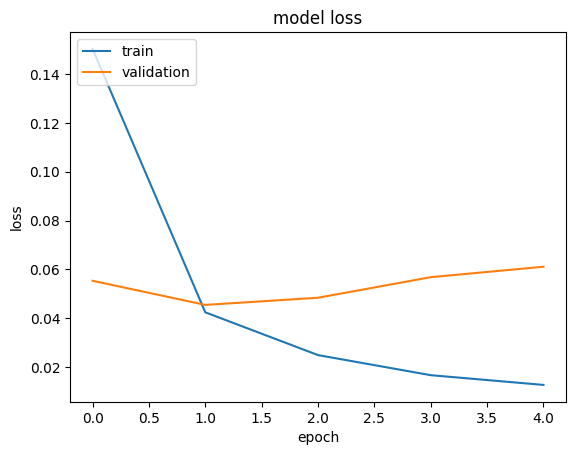

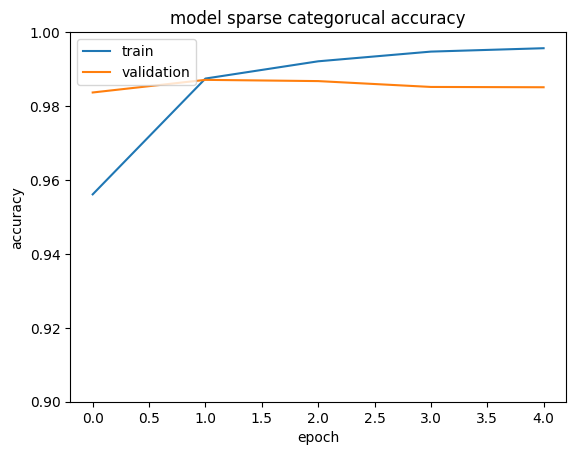

Epoch 1/10
375/375 [==============================] - 49s 126ms/step - loss: 0.2150 - sparse_categorical_accuracy: 0.9345 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9832
Epoch 2/10
375/375 [==============================] - 50s 133ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.0510 - val_sparse_categorical_accuracy: 0.9853
Epoch 3/10
375/375 [==============================] - 49s 130ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.0490 - val_sparse_categorical_accuracy: 0.9857
Epoch 4/10
375/375 [==============================] - 51s 135ms/step - loss: 0.0364 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0415 - val_sparse_categorical_accuracy: 0.9891
Epoch 5/10
375/375 [==============================] - 50s 132ms/step - loss: 0.0296 - sparse_categorical_accuracy: 0.9903 - val_loss: 0.0429 - val_sparse_categorical_accuracy: 0.9887
Epoch 6/10
375/375 [==============================] - 50s 134ms/step - loss: 0.0238 -

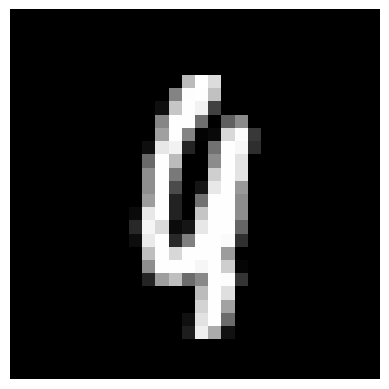

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
mnist_dataset = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist_dataset

# Перевірка розмірів даних
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Візуалізація даних
def visualize_dataset_item(x, y):
 print("Цифра:", y)
 plt.imshow(x, cmap=plt.cm.gray)
 plt.axis('off')
item_index = 0
visualize_dataset_item(x_train[item_index], y_train[item_index])

# Розподіл міток
plt.hist(y_train, bins = 10)
plt.show()
plt.hist(y_test, bins = 10)
plt.show()

def preprocess_image(image):
 image = tf.reshape(image, [28, 28, 1])
 image = tf.image.per_image_standardization(image)
 return image

total_count = len(y_train)
images_dataset = tf.data.Dataset.from_tensor_slices(x_train)
images_dataset = images_dataset.map(preprocess_image)
labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
dataset = tf.data.Dataset.zip((images_dataset, labels_dataset))
dataset = dataset.shuffle(buffer_size=1024)
train_dataset = dataset.take(round(total_count * 0.8))
val_dataset = dataset.skip(round(total_count * 0.8))
train_dataset = train_dataset.batch(128, drop_remainder = False)
train_dataset = train_dataset.prefetch(4)
val_dataset = val_dataset.batch(1, drop_remainder = False)
val_dataset = val_dataset.prefetch(4)

# Побудова моделі нейронної мережі
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
 tf.keras.layers.MaxPool2D(),
 tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'],)

# Тренування моделі
history = model.fit(train_dataset, epochs = 5, validation_data = val_dataset)

def show_history_charts(histpry):
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()
 plt.plot(history.history['sparse_categorical_accuracy'])
 plt.plot(history.history['val_sparse_categorical_accuracy'])
 plt.title('model sparse categorucal accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'validation'], loc='upper left')
 plt.ylim(0.9, 1)
 plt.show()

show_history_charts(history)

model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
 tf.keras.layers.MaxPool2D(),
 tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.35),
 tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'],)
history = model.fit(train_dataset, epochs = 10, validation_data = val_dataset)

model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (5, 5), padding = 'same', input_shape=(28, 28, 1), activation='relu'),
 tf.keras.layers.Conv2D(32, (5, 5), padding = 'same', activation='relu'),
 tf.keras.layers.MaxPool2D(),
 tf.keras.layers.Conv2D(64, (2, 2), padding = 'same', activation='relu'),
 tf.keras.layers.Conv2D(64, (2, 2), padding = 'same', activation='relu'),
 tf.keras.layers.MaxPool2D(),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(256, activation='relu'),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.35),
 tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'],)
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)
total_count = len(y_test)
test_images_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_images_dataset = test_images_dataset.map(preprocess_image)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)
test_dataset = tf.data.Dataset.zip((test_images_dataset, test_labels_dataset))
test_dataset = test_dataset.batch(128, drop_remainder = False)
test_dataset = test_dataset.prefetch(4)
y_pred = model.predict(test_dataset)

item_index = 3
visualize_dataset_item(x_test[item_index], np.argmax(y_pred[item_index]))
invalid_prediction_indexes = []

for i in range(len(y_test)):
 if np.argmax(y_pred[i]) != y_test[i]:
  invalid_prediction_indexes.append(i)
index = 10

print("Predicted:", np.argmax(y_pred[invalid_prediction_indexes[index]]))

visualize_dataset_item(x_test[invalid_prediction_indexes[index]], y_test[invalid_prediction_indexes[index]])

print("Test accuracy:", str(100 - round(len(invalid_prediction_indexes) / len(y_pred) * 100, 2)) + "%")

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Цифра: 5


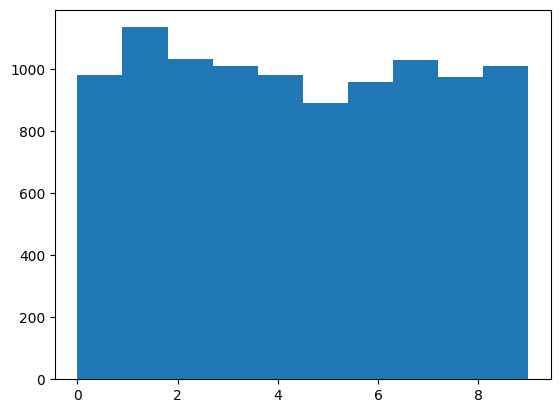

Epoch 1/5
375/375 [==============================] - 102s 270ms/step - loss: 0.1481 - sparse_categorical_accuracy: 0.9551 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9806
Epoch 2/5
375/375 [==============================] - 83s 222ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0.9879 - val_loss: 0.0497 - val_sparse_categorical_accuracy: 0.9854
Epoch 3/5
375/375 [==============================] - 82s 218ms/step - loss: 0.0218 - sparse_categorical_accuracy: 0.9928 - val_loss: 0.0504 - val_sparse_categorical_accuracy: 0.9870
Epoch 4/5
375/375 [==============================] - 100s 268ms/step - loss: 0.0149 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9835
Epoch 5/5
375/375 [==============================] - 81s 215ms/step - loss: 0.0114 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.0492 - val_sparse_categorical_accuracy: 0.9892


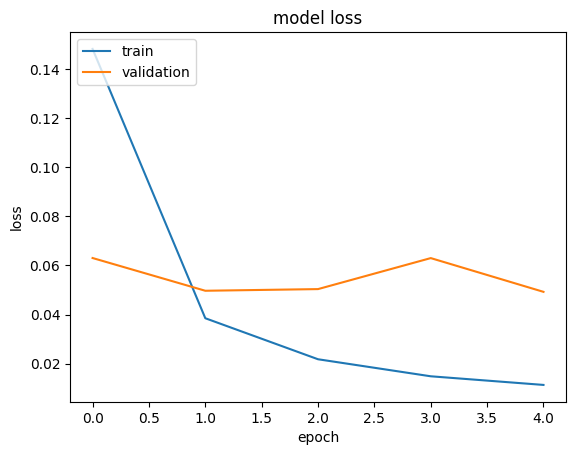

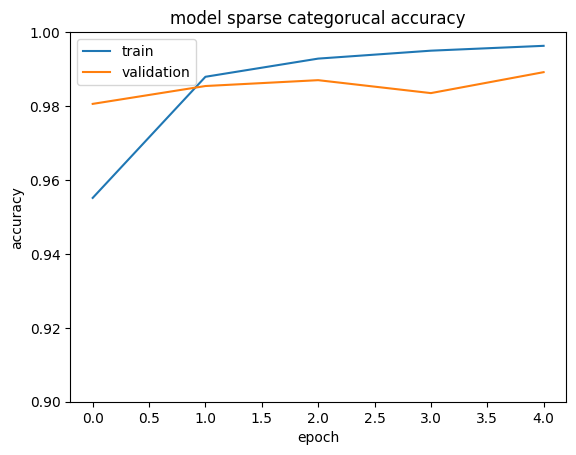

Epoch 1/20
375/375 [==============================] - 139s 367ms/step - loss: 0.1950 - sparse_categorical_accuracy: 0.9419 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9699
Epoch 2/20
375/375 [==============================] - 137s 365ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0429 - val_sparse_categorical_accuracy: 0.9871
Epoch 3/20
375/375 [==============================] - 137s 366ms/step - loss: 0.0458 - sparse_categorical_accuracy: 0.9855 - val_loss: 0.0373 - val_sparse_categorical_accuracy: 0.9896
Epoch 4/20
375/375 [==============================] - 137s 365ms/step - loss: 0.0404 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.0393 - val_sparse_categorical_accuracy: 0.9887
Epoch 5/20
375/375 [==============================] - 121s 324ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9892 - val_loss: 0.0291 - val_sparse_categorical_accuracy: 0.9912
Epoch 6/20
375/375 [==============================] - 120s 319ms/step - loss: 0.

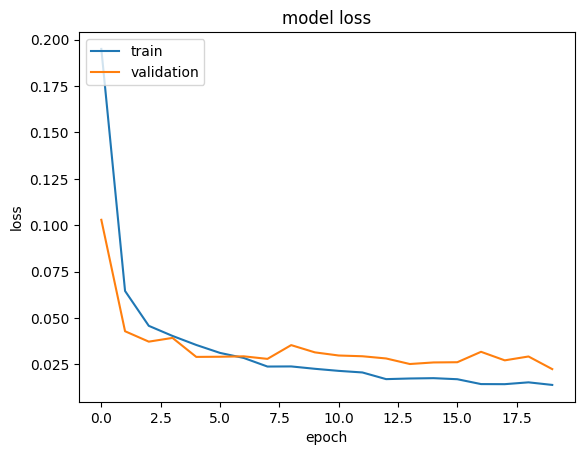

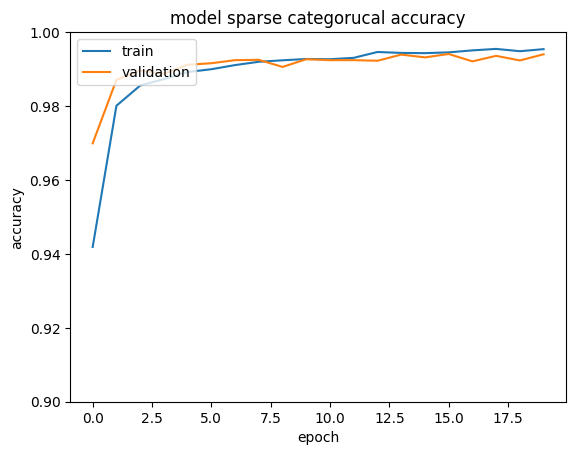

79/79 [==============================] - 5s 67ms/step
Цифра: 0
Predicted: 1
Цифра: 7
Test accuracy1: 99.45%


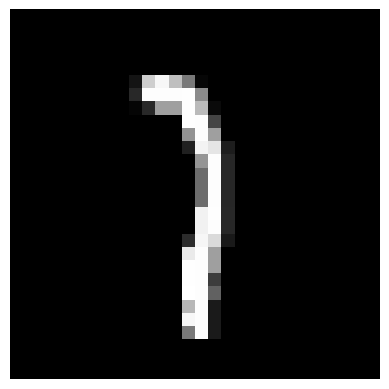

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Завантаження даних
mnist_dataset = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist_dataset
# Перевірка розмірів даних
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Візуалізація даних
def visualize_dataset_item(x, y):
 print("Цифра:", y)
 plt.imshow(x, cmap=plt.cm.gray)
 plt.axis('off')
item_index = 0
visualize_dataset_item(x_train[item_index], y_train[item_index])

# Розподіл міток
plt.hist(y_train, bins = 10)
plt.show()
plt.hist(y_test, bins = 10)
plt.show()

# Передобробка даних
def preprocess_image(image):
 image = tf.reshape(image, [28, 28, 1])
 image = tf.image.per_image_standardization(image)
 return image
total_count = len(y_train)
images_dataset = tf.data.Dataset.from_tensor_slices(x_train)
images_dataset = images_dataset.map(preprocess_image)
labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
dataset = tf.data.Dataset.zip((images_dataset, labels_dataset))
dataset = dataset.shuffle(buffer_size=1024)
train_dataset = dataset.take(round(total_count * 0.8))
val_dataset = dataset.skip(round(total_count * 0.8))
train_dataset = train_dataset.batch(128, drop_remainder = False)
train_dataset = train_dataset.prefetch(4)
val_dataset = val_dataset.batch(1, drop_remainder = False)
val_dataset = val_dataset.prefetch(4)
# Архітектура моделі
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'),
 tf.keras.layers.MaxPool2D(),
 tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'],)

# Тренування моделі
history = model.fit(train_dataset, epochs = 5, validation_data = val_dataset)

# Функція для візуалізаціі історії навчання
def show_history_charts(histpry):
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train', 'validation'], loc='upper left')
 plt.show()
 plt.plot(history.history['sparse_categorical_accuracy'])
 plt.plot(history.history['val_sparse_categorical_accuracy'])
 plt.title('model sparse categorucal accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'validation'], loc='upper left')
 plt.ylim(0.9, 1)
 plt.show()

 # Візуалізація історії навчання
show_history_charts(history)

# Більш складна архітектура
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D(),
   tf.keras.layers.Dropout(0.25),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D(),
   tf.keras.layers.Dropout(0.25),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(10, activation='softmax')
])
# ])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'],)
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset)
show_history_charts(history)

total_count = len(y_test)
test_images_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_images_dataset = test_images_dataset.map(preprocess_image)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)
test_dataset = tf.data.Dataset.zip((test_images_dataset, test_labels_dataset))
test_dataset = test_dataset.batch(128, drop_remainder = False)
test_dataset = test_dataset.prefetch(4)
y_pred = model.predict(test_dataset)

item_index = 3
visualize_dataset_item(x_test[item_index], np.argmax(y_pred[item_index]))
invalid_prediction_indexes = []
for i in range(len(y_test)):
 if np.argmax(y_pred[i]) != y_test[i]:
  invalid_prediction_indexes.append(i)
index = 10
print("Predicted:", np.argmax(y_pred[invalid_prediction_indexes[index]]))
visualize_dataset_item(x_test[invalid_prediction_indexes[index]], y_test[invalid_prediction_indexes[index]])

print("Test accuracy1:", str(100 - round(len(invalid_prediction_indexes) / len(y_pred) * 100, 2)) + "%")

model.save('my_model.h5')


1/1 [==============================] - 0s 118ms/step


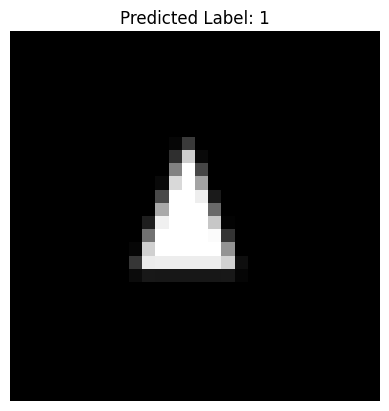

In [4]:
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

model = tf.keras.models.load_model('/content/sample_data/my_model.h5')

image = Image.open('/content/sample_data/1.jpg').convert('L')
def preprocess_image(image):
 image = tf.reshape(image, [28, 28, 1])
 image = tf.image.per_image_standardization(image)
 return image
image = image.resize((28, 28))  
image = np.array(image)
preprocessed_image = preprocess_image(image)

preprocessed_image = np.reshape(preprocessed_image, (1, 28, 28, 1))

predictions = model.predict(preprocessed_image)
predicted_label = np.argmax(predictions)


plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()